In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'train.csv') 
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#df_valid = pd.read_csv(r'test.csv') 
#df_valid.head()

In [4]:
#df.info()

In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000



 mu = 180921.20 and sigma = 79415.29



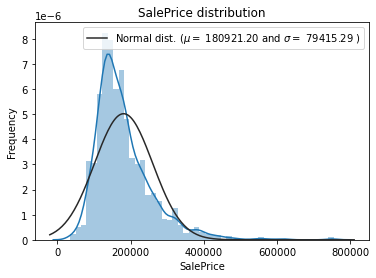

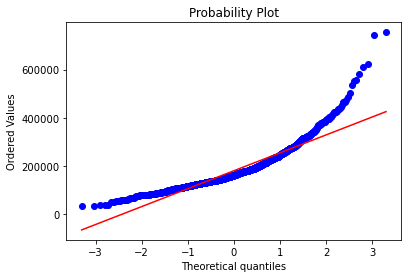

In [6]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics

sns.distplot(df['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)
plt.show()

The target variable is right skewed. As (linear) models love normally distributed data , we need to transform this variable and make it more normally distributed.

Log-transformation of the target variable


 mu = 12.02 and sigma = 0.40



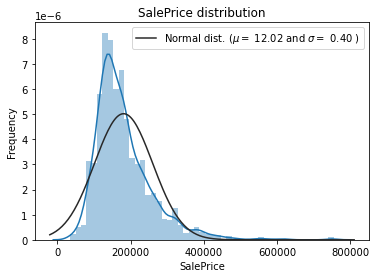

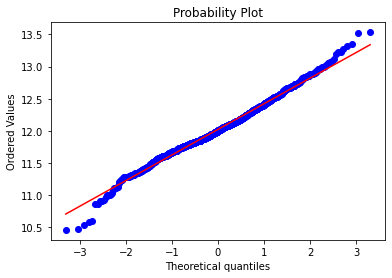

In [7]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
df["SalePrice-log"] = np.log1p(df["SalePrice"])

#Check the new distribution 
sns.distplot(df['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['SalePrice-log'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['SalePrice-log'], plot=plt)
plt.show()

In [8]:
#Missing data

all_data_na = (df.isnull().sum() / len(df)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
#[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageYrBlt,5.547945
GarageType,5.547945
GarageFinish,5.547945
GarageQual,5.547945


Text(0.5, 1.0, 'Percent missing data by feature')

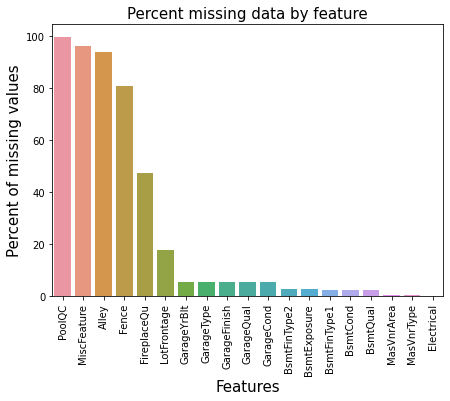

In [9]:
f, ax = plt.subplots(figsize=(7, 5))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

### Imputing missing values 

We impute them  by proceeding sequentially  through features with missing values 

- **PoolQC** : data description says NA means "No  Pool". That make sense, given the huge ratio of missing value (+99%) and majority of houses have no Pool at all in general. 

In [10]:
df["PoolQC"] = df["PoolQC"].fillna("None")

- **MiscFeature** : data description says NA means "no misc feature"


In [11]:
df["MiscFeature"] = df["MiscFeature"].fillna("None")

- **Alley** : data description says NA means "no alley access"

In [12]:
df["Alley"] = df["Alley"].fillna("None")

- **Fence** : data description says NA means "no fence"

In [13]:
df["Fence"] = df["Fence"].fillna("None")

- **FireplaceQu** : data description says NA means "no fireplace"

In [14]:
df["FireplaceQu"] = df["FireplaceQu"].fillna("None")

- **LotFrontage** : Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can **fill in missing values by the median LotFrontage of the neighborhood**.

In [15]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

- **GarageType, GarageFinish, GarageQual and GarageCond** : Replacing missing data with None

In [16]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df[col] = df[col].fillna('None')

- **GarageYrBlt, GarageArea and GarageCars** : Replacing missing data with 0 (Since No garage = no cars in such garage.)


In [17]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    df[col] = df[col].fillna(0)

- **BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath** : missing values are likely zero for having no basement

In [18]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    df[col] = df[col].fillna(0)

- **BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2** : For all these categorical basement-related features, NaN means that there is no  basement.


In [19]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df[col] = df[col].fillna('None')

- **MasVnrArea and MasVnrType** : NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type. 


In [20]:
df["MasVnrType"] = df["MasVnrType"].fillna("None")
df["MasVnrArea"] = df["MasVnrArea"].fillna(0)

- **MSZoning (The general zoning classification)** :  'RL' is by far  the most common value.  So we can fill in missing values with 'RL'


In [21]:
df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])

- **Utilities** : For this categorical feature all records are "AllPub", except for one "NoSeWa"  and 2 NA . Since the house with 'NoSewa' is in the training set, **this feature won't help in predictive modelling**. We can then safely  remove it.


In [22]:
df = df.drop(['Utilities'], axis=1)

- **Functional** : data description says NA means typical

In [23]:
df["Functional"] = df["Functional"].fillna("Typ")

- **Electrical** : It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.


In [24]:
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

- **KitchenQual**: Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent)  for the missing value in KitchenQual.


In [25]:
df['KitchenQual'] = df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])

- **Exterior1st and Exterior2nd** : Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string


In [26]:
df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])

- **SaleType** : Fill in again with most frequent which is "WD"

In [27]:
df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])

- **MSSubClass** : Na most likely means No building class. We can replace missing values with None


In [28]:
df['MSSubClass'] = df['MSSubClass'].fillna("None")

Is there any remaining missing value ? 

In [29]:
#Check remaining missing values if any 
all_data_na = (df.isnull().sum() / len(df)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


It remains no missing value.


### Correlation Map

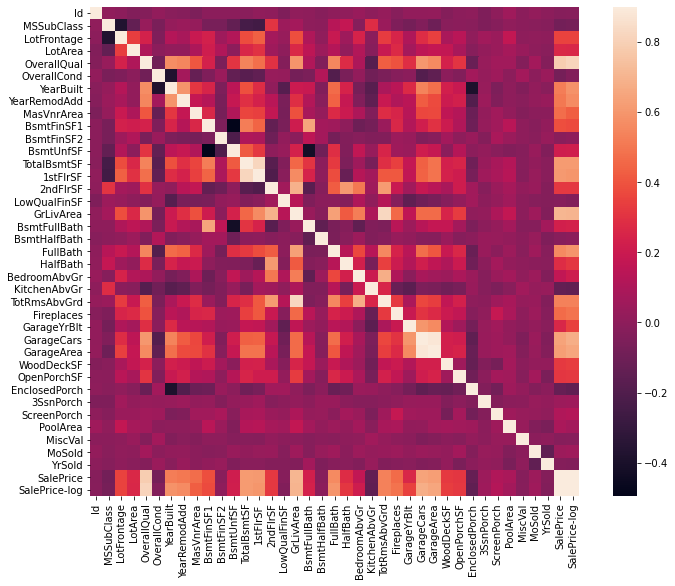

In [30]:
#Correlation map to see how features are correlated with SalePrice
corrmat = df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

### More features engineering

**Transforming some numerical variables that are really categorical**

In [31]:
#MSSubClass=The building class
df['MSSubClass'] = df['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
df['OverallCond'] = df['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
df['YrSold'] = df['YrSold'].astype(str)
df['MoSold'] = df['MoSold'].astype(str)

**Label Encoding some categorical variables that may contain information in their ordering set** 

In [32]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(df[c].values)) 
    df[c] = lbl.transform(list(df[c].values))

# shape        
print('Shape all_data: {}'.format(df.shape))

Shape all_data: (1460, 81)


**Adding one more important feature**

Since area related features are very important to determine house prices, we add one more feature which is the total area of basement, first and second floor areas of each house

In [33]:
# Adding total sqfootage feature 
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

**Skewed features**

In [34]:
numeric_feats = df.dtypes[df.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = df[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,24.451640
PoolArea,14.813135
LotArea,12.195142
3SsnPorch,10.293752
LowQualFinSF,9.002080
LandSlope,4.808735
KitchenAbvGr,4.483784
BsmtFinSF2,4.250888
ScreenPorch,4.117977
BsmtHalfBath,4.099186


**Box Cox Transformation of (highly) skewed features**

We use the scipy  function boxcox1p which computes the Box-Cox transformation of **\\(1 + x\\)**. 

Note that setting \\( \lambda = 0 \\) is equivalent to log1p used above for the target variable.  

See [this page][1] for more details on Box Cox Transformation as well as [the scipy function's page][2]
[1]: http://onlinestatbook.com/2/transformations/box-cox.html
[2]: https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.special.boxcox1p.html

In [35]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    df[feat] = boxcox1p(df[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])

There are 62 skewed numerical features to Box Cox transform


**Getting dummy categorical features**

In [36]:
df = pd.get_dummies(df)
df.shape

(1460, 224)

In [37]:
df.head()

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.730463,2.750250,5.831328,19.212182,0.730463,0.730463,1.540963,0.0,2.440268,1.820334,...,0,0,0,1,0,0,0,0,1,0
1,1.194318,1.820334,6.221214,19.712205,0.730463,0.730463,1.540963,0.0,2.259674,2.440268,...,0,0,0,1,0,0,0,0,1,0
2,1.540963,2.750250,5.914940,20.347241,0.730463,0.730463,0.000000,0.0,2.440268,1.820334,...,0,0,0,1,0,0,0,0,1,0
3,1.820334,2.885846,5.684507,19.691553,0.730463,0.730463,0.000000,0.0,2.440268,1.820334,...,0,0,0,1,1,0,0,0,0,0
4,2.055642,2.750250,6.314735,21.325160,0.730463,0.730463,0.000000,0.0,2.602594,1.820334,...,0,0,0,1,0,0,0,0,1,0


# Model Preparation

In [38]:
#Variables that we use to make the prediction in our model
Feature = df.drop(['Id','SalePrice'], axis=1)
Feature.head()

,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,2.750250,5.831328,19.212182,0.730463,0.730463,1.540963,0.0,2.440268,1.820334,14.187527,...,0,0,0,1,0,0,0,0,1,0
1,1.820334,6.221214,19.712205,0.730463,0.730463,1.540963,0.0,2.259674,2.440268,14.145138,...,0,0,0,1,0,0,0,0,1,0
2,2.750250,5.914940,20.347241,0.730463,0.730463,0.000000,0.0,2.440268,1.820334,14.184404,...,0,0,0,1,0,0,0,0,1,0
3,2.885846,5.684507,19.691553,0.730463,0.730463,0.000000,0.0,2.440268,1.820334,14.047529,...,0,0,0,1,1,0,0,0,0,0
4,2.750250,6.314735,21.325160,0.730463,0.730463,0.000000,0.0,2.602594,1.820334,14.182841,...,0,0,0,1,0,0,0,0,1,0


In [39]:
# Standardizing the parametres
from sklearn import preprocessing
X= preprocessing.StandardScaler().fit(Feature).transform(Feature)

In [40]:
# Target variable
y = df['SalePrice'].values

In [41]:
#inputs for the models
rand_state=13
n_est=3000
t_size=0.10

In [42]:
# Splitting the data two samples, training (90 %) and test (10 %) datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=t_size, random_state=rand_state)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1314, 222) (1314,)
Test set: (146, 222) (146,)


In [43]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.kernel_ridge import KernelRidge

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.ensemble import StackingRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error

## Modeling <a id= "9"></a>
* I am also skipping the hyperparameter tuning and used already tuned hyperparameters here
* We will use multiple models individually as well as in ensemble mode to test the final predictions.
* We are going to use **Root Mean Square Error(RMSE)** metric to compare the scores. Since this metrics is not available out of the box we will create a function for it.

Note: RMSE metric is used to express the loss in the same unit of measurement as label value, in this case house price in dollars. For example if RMSE for house price is 2, then we can loosely interpret it as 'on average incorrect predictions are wrong by around 2 house prices'

In [44]:
models_scores = [] # To store model scores

def rmse(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    return mean_squared_error(y_test, y_pred, squared= False) # squared= False > returns Root Mean Square Error                  

### Linear Regression <a id= "10"></a>

* Lest test using Ordinary least squares Linear Regression.
* LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

In [45]:
linear_regression = make_pipeline(LinearRegression())
score = rmse(linear_regression)

models_scores.append(['LinearRegression', score])
print(f'LinearRegression Score= {score}')

LinearRegression Score= 26308039592.40091


### Lasso Regression <a id= "11"></a>
* The Lasso is a linear model that estimates sparse coefficients. It is useful in some contexts due to its tendency to prefer solutions with fewer non-zero coefficients, effectively reducing the number of features upon which the given solution is dependent. 
* This model may be very sensitive to outliers. So we need to made it more robust on them. For that we use the sklearn's Robustscaler() method on pipeline

In [46]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha=0.0005, random_state= rand_state))

score = rmse(lasso)
models_scores.append(['Lasso', score])
print(f'Lasso Score= {score}')

Lasso Score= 0.16031626995734746


/Users/Molnar/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.587605434923777, tolerance: 0.7783926736445941
  model = cd_fast.enet_coordinate_descent(


### ElasticNet Regression <a id= "12"></a>
* Elastic-net is useful when there are multiple features which are correlated with one another. Lasso is likely to pick one of these at random, while elastic-net is likely to pick both.
* A practical advantage of trading-off between Lasso and Ridge is that it allows Elastic-Net to inherit some of Ridge’s stability under rotation.
* This model may be very sensitive to outliers. So we need to made it more robust on them. For that we use the sklearn's Robustscaler() method on pipeline

In [47]:
elastic_net = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio= .9, random_state= rand_state))

score = rmse(elastic_net)
models_scores.append(['ElasticNet', score])
print(f'ElasticNet Score= {score}')

ElasticNet Score= 0.16024085030717106


/Users/Molnar/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.617759319749997, tolerance: 0.7783926736445941
  model = cd_fast.enet_coordinate_descent(


### KernelRidge Regression 
* Ridge regression addresses some of the problems of Ordinary Least Squares by imposing a penalty on the size of the coefficients.

In [48]:
kernel_ridge= KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
score = rmse(kernel_ridge)
models_scores.append(['KernelRidge', score])
print(f'KernelRidge Score= {score}')

KernelRidge Score= 0.49786567905954426


### Gradient Boosting Regression

With **huber**  loss that makes it robust to outliers

In [49]:
GBoost = GradientBoostingRegressor(n_estimators=n_est, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =rand_state)

score = rmse(GBoost)
models_scores.append(['Gradient-Boosting', score])
print(f'Gradient-Boosting Score= {score}')

Gradient-Boosting Score= 0.6883469819065607


In [50]:
# Ranking the scores of each model
pd.DataFrame(models_scores).sort_values(by=[1], ascending=True)

,0,1
2,ElasticNet,1.602409e-01
1,Lasso,1.603163e-01
3,KernelRidge,4.978657e-01
4,Gradient-Boosting,6.883470e-01
0,LinearRegression,2.630804e+10


# Stacking Ensemble

### Stacking <a id= "20"></a>

* We can use sklearns **StackingClassifier** and **StackingRegressor** to for classification and regression problem respectively.
* Since "lasso" is our best performing model we will use it as our meta learner and rest models as base estimators.

In [51]:
from sklearn.ensemble import StackingRegressor
estimators = [ ('elastic_net', elastic_net), ('kernel_ridge', kernel_ridge),('gb_regressor', GBoost) ]

stack = StackingRegressor(estimators=estimators, final_estimator= lasso, cv= 5, n_jobs= -1, passthrough = True)

stack.fit(X_train, y_train)

pred = stack.predict(X_test)

rmse_val = mean_squared_error(y_test, pred, squared= False) # squared= False > returns Root Mean Square Error    
models_scores.append(['Stacking', rmse_val])
print(f'rmse= {rmse_val}')

rmse= 0.14653400657753562


/Users/Molnar/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.312057532374144, tolerance: 0.7783926736445941
  model = cd_fast.enet_coordinate_descent(


In [52]:
# Ranking the scores of each model
pd.DataFrame(models_scores).sort_values(by=[1], ascending=True)

,0,1
5,Stacking,1.465340e-01
2,ElasticNet,1.602409e-01
1,Lasso,1.603163e-01
3,KernelRidge,4.978657e-01
4,Gradient-Boosting,6.883470e-01
0,LinearRegression,2.630804e+10


----